_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [104]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
7103,43,24500.0,1,70,1.8,2,1,2012,0
8415,42,67900.0,0,60,3.0,3,1,2013,1
5489,66,8200.0,4,124,1.2,0,1,2011,0
5893,33,10400.0,3,78,1.4,3,1,2011,0
5330,56,6850.0,4,212,2.5,0,1,2002,2
2071,39,8800.0,0,102,2.0,0,1,2008,1
6519,4,69999.0,0,21,3.0,3,1,2015,1
2402,59,5950.0,5,135,1.5,0,1,2012,0
8427,76,5000.0,0,18,1.6,1,1,1989,1
1293,77,20800.0,2,160,2.0,0,1,2012,1


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [0]:
target = 'price'
features = df.columns.drop('price')

y = df[target]
X = df[features]

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, test_size=.20, random_state=3)

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [107]:
features = ['year', 'mileage']

model = LinearRegression()
model.fit(X_train[features], y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [108]:
print('intercept: ', model.intercept_, 'coefficients: ',  model.coef_)

intercept:  -2167340.7899214127 coefficients:  [1091.44589818  -45.43216792]


## 1.5 Use the test data to make predictions.

In [109]:
y_pred = model.predict(X_test[features])
y_pred

array([19375.89948247, 20193.67850512, 19788.01059774, ...,
       17926.36558081, 25876.99496764,  6193.05370841])

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [110]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('rmse: ', rmse, 'r2: ', r2)

rmse:  20204.382033228845 r2:  0.19872478227172274


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

For each year that the car is newer (more recent), the price goes up the coefficient amount.  In this case, $1091.44

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

The rmse explains how close the predicted data is to the actual test data that was thrown to it.  It indicates how well the model fits the data.  In this case, rmse of 20204.38.. can be explaiend by saying that the predictions will be off by that much on average. (not great)

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

R2 is another measure of fit. An R2 of .1987.. can be interpreted by saying that this model improves your chances of predicting the price by 19%, compared to picking at random.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price'] = np.log(df['price'])

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

In [0]:
target = 'ln_price'
features = df.columns.drop(['price', 'ln_price'])


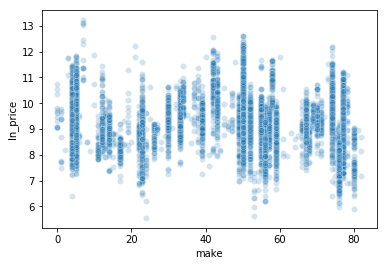

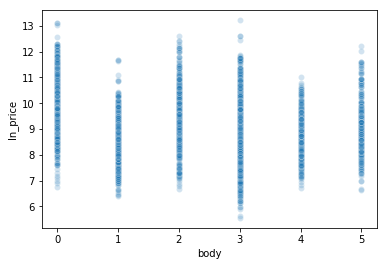

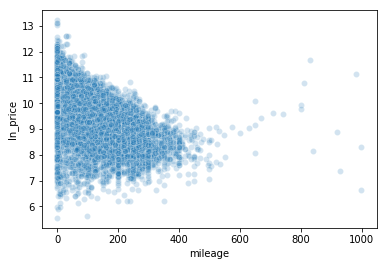

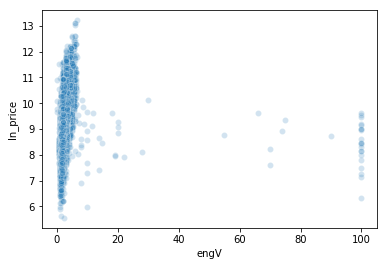

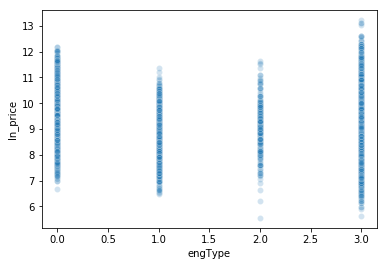

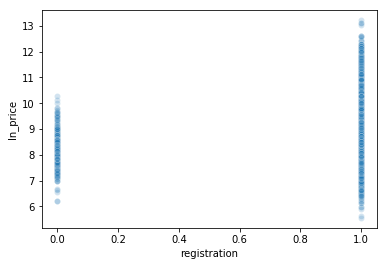

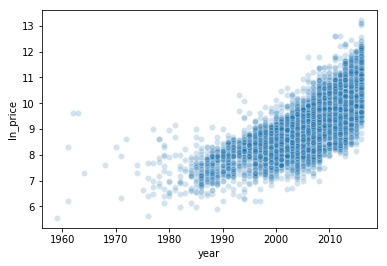

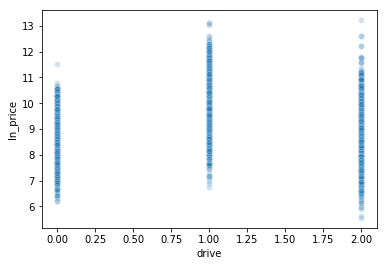

In [113]:
for feature in features:
  sns.scatterplot(x=feature, y=target, data=df, alpha=.2)
  plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [0]:
df['year_squared'] = df['year']**2
df['engV_squared'] =df['engV']**2

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, test_size=.20, random_state=3)

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [120]:
features = df.columns.drop(['price', 'ln_price'])

y = df[target]
X = df[features]

model = LinearRegression()
model.fit(X_train[features], y_train)

y_pred = model.predict(X_test[features])

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('rmse: ', rmse, 'r2: ', r2)
print('intercept: ', model.intercept_, 'coefficients: ', model.coef_)

rmse:  0.46841566213373276 r2:  0.7678745574274062
intercept:  6715.210670779128 coefficients:  [-1.28551673e-03 -7.64384160e-02  5.25769035e-04  2.20486046e-01
 -4.72423776e-02  6.69635998e-01 -6.79946651e+00  2.64608934e-01
  1.72278243e-03 -2.23411484e-03]


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

Instead of the change by the coefficient being explained in units, the change is explained in percentages. 

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [0]:
target = 'ln_price'
features = ['year_squared', 'engV_squared']

y = df[target]
X = df[features]

In [126]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [127]:
print('R2: ', tree.score(X_test, y_test))

R2:  0.6896980383957804


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [133]:
target = 'ln_price'
features = df.columns.drop(['price', 'ln_price'])

y = df[target]
X = df[features]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     2462.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        16:08:32   Log-Likelihood:                -5940.3
No. Observations:                8495   AIC:                         1.190e+04
Df Residuals:                    8484   BIC:                         1.198e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6816.3696    287.396     23.718   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [134]:
vif = [variance_inflation_factor(sm.add_constant(X).values, i) for i in range(len(sm.add_constant(X).columns))]
pd.Series(vif, sm.add_constant(X).columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           2.955721e+09
make            1.062331e+00
body            1.176906e+00
mileage         1.941528e+00
engV            2.363178e+01
engType         1.154769e+00
registration    1.108734e+00
year            1.418083e+05
drive           1.249272e+00
year_squared    1.420507e+05
engV_squared    2.348276e+01
dtype: float64

Yes, there are multicollinearity problems.  With the 'year', 'engV', 'year_squared' and 'engV_squared' features.  